# Hubbard parameter calculations for figures

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)


In [4]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 8
Ly = 1
d = 3
shape = 'square'
w = 'x'
eqt = 'UvT'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(73.0219, 1000),
                 lc=1550,
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=True,
                 eqtarget=eqt,
                 lattice_symmetry=True,
                 symmetry=True,
                 verbosity=0)
G.draw_graph(nnn=True)


Lattice: lattice shape is square; lattice constants set to: (1450, 1450)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Illegal x0 provided. Use no initial guess.
Equalize: varying waist direction = x.
Equalize: method = trf
Equalize: quantities = UvT

Equalize: scale factor = 0.23723837801360126
Equalize: target tunneling = 0.23723837801360126, None
Equalize: target interaction = 1.7079002948795075
Equalize: target onsite potential = 0
i=1	c=[0.42416186 0.14502511 3.1467208 ]	c_i=3.1784897868261894	c_i//2-c_i=0.0
i=2	c=[0.42416186 0.14502509 3.1467192 ]	c_i=3.1784882086735102	c_i//2-c_i=0.0
i=3	c=[0.42416183 0.14502512 3.14672126]	c_i=3.178490248006828	c_i//2-c_i=-2.039333317771508e-06
i=4	c=[0.42416182 0.14502511 3.14672137]	c_i=3.1784903553575443	c_i//2-c_i=-1.0735071631629012e-07
i=5	c=[0.42416183 0.14502511 3.14672138]	c_i=3.1784903581880606	c_i//2-c_i=-1.1018123258210721e-07
i=6	c=[0.42416186 0.14502515 3.14672055]	c_i=3.1784895494143512	c_i//

ValueError: Unknown format code 'd' for object of type 'float'

## 20 site ring

In [5]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 20
Ly = 1
d = 3
shape = 'ring'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=1550,
                 ascatt=1770,
                 laser=780,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
G.draw_graph(nnn=False, A=G.A, U=G.U)
print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')


Ring size adjust to: 20
Lattice: lattice shape is ring; lattice constants set to: (1550, 1550)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.


ValueError: too many values to unpack (expected 2)

# Equalization

## 1D chain

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1550)
lattice: lattice shape is square
lattice: Full lattice sizes: [8 1]
lattice: lattice constants: [1.55 1.55]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[56 20 20] is set.
DVR: R0=[8.425 3.    7.2  ]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.

Start to plot graph...


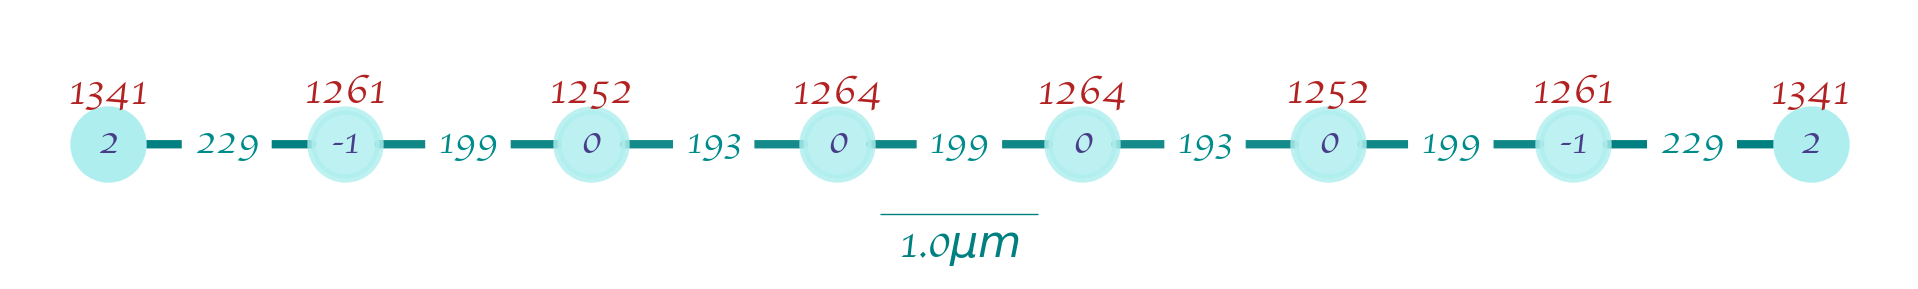

In [8]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 8
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'UvT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550,),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize_V0=False,
                 equalize=False,
                 eqtarget=eqt,
                 eqmethod=meth,
                 symmetry=True,
                 verbosity=3)

fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1550)
lattice: lattice shape is square
lattice: Full lattice sizes: [8 1]
lattice: lattice constants: [1.55 1.55]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[56 20 20] is set.
DVR: R0=[8.425 3.    7.2  ]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.

Start to plot graph...


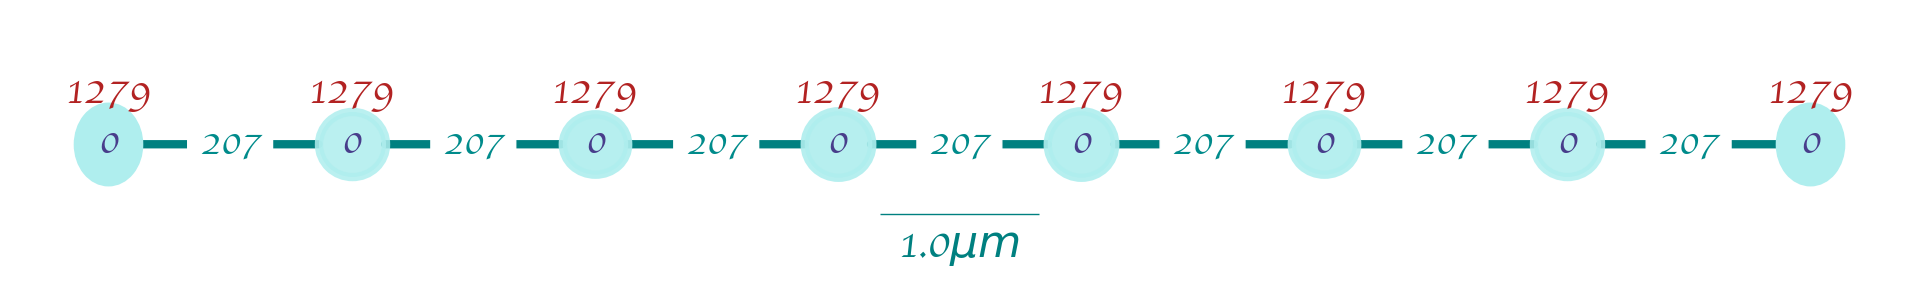

In [22]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 8
Ly = 1
d = 3
shape = 'square'
w = 'x'
eqt = 'UvT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550,),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 eqmethod=meth,
                 symmetry=True,
                 verbosity=3)

fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)


## 2D lattices

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
lattice: lattice shape is square
lattice: Full lattice sizes: [3 3]
lattice: lattice constants: [1.55 1.6 ]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.6  7.2 ]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.

Start to plot graph...


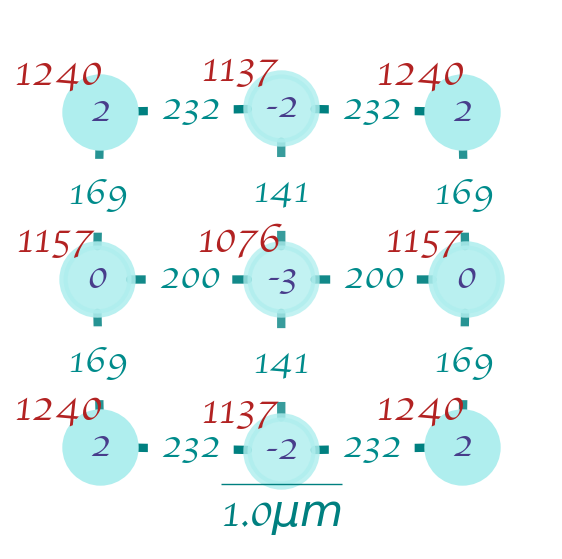

In [11]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = None
eqt = 'UvT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize_V0=False,
                 equalize=False,
                 eqtarget=eqt,
                 eqmethod=meth,
                 ghost=False,
                 symmetry=True,
                 verbosity=3)

fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
lattice: lattice shape is square
lattice: Full lattice sizes: [3 3]
lattice: lattice constants: [1.55 1.6 ]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.6  7.2 ]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.

Start to plot graph...


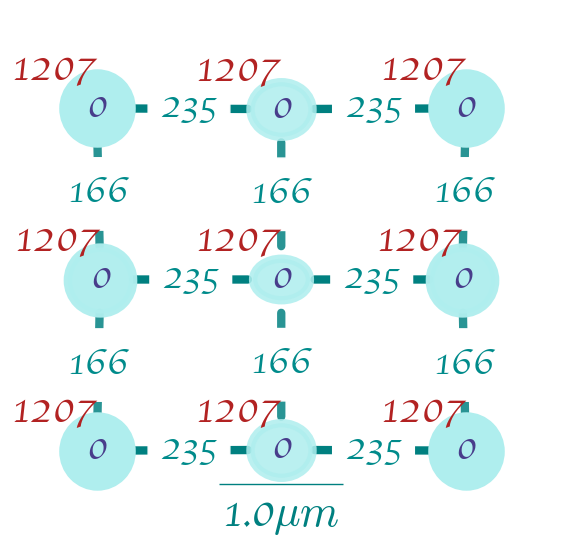

In [2]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'square'
w = 'xy'
eqt = 'UvT'
meth = 'praxis'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 equalize_V0=False,
                 eqtarget=eqt,
                 eqmethod=meth,
                 symmetry=True,
                 verbosity=3)

fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lieb lattice size adjust to: [3 3]
Lattice: lattice shape is Lieb; lattice constants set to: (1550, 1600)
lattice: lattice shape is Lieb
lattice: Full lattice sizes: [3 3]
lattice: lattice constants: [1.55 1.6 ]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.6  7.2 ]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.

Start to plot graph...


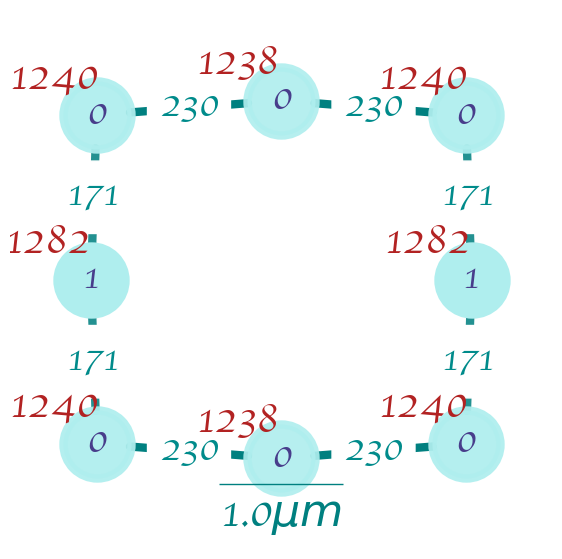

In [14]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'UvT'
meth = 'NM'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 sparse=True,
                 shape=shape,
                 equalize_V0=False,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 eqmethod=meth,
                 symmetry=True,
                 verbosity=3)

fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
# update_tc(fn, G)
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lieb lattice size adjust to: [3 3]
Lattice: lattice shape is Lieb; lattice constants set to: (1550, 1600)
lattice: lattice shape is Lieb
lattice: Full lattice sizes: [3 3]
lattice: lattice constants: [1.55 1.6 ]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.6  7.2 ]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.

Start to plot graph...


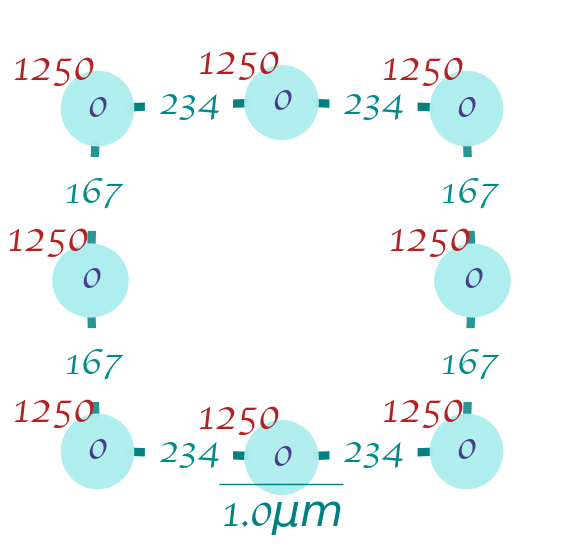

In [15]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 3
Ly = 3
d = 3
shape = 'Lieb'
w = 'xy'
eqt = 'UvT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=(1550, 1600),
                 ascatt=1770,
                 laser=780,
                 band=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 equalize_V0=False,
                 eqtarget=eqt,
                 eqmethod=meth,
                 symmetry=True,
                 verbosity=3)

fn = f'../output/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
# update_tc(fn, G)
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)


### Proposal figure

Lattice: lattice shape is square; lattice constants set to: (1550, 1550)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.


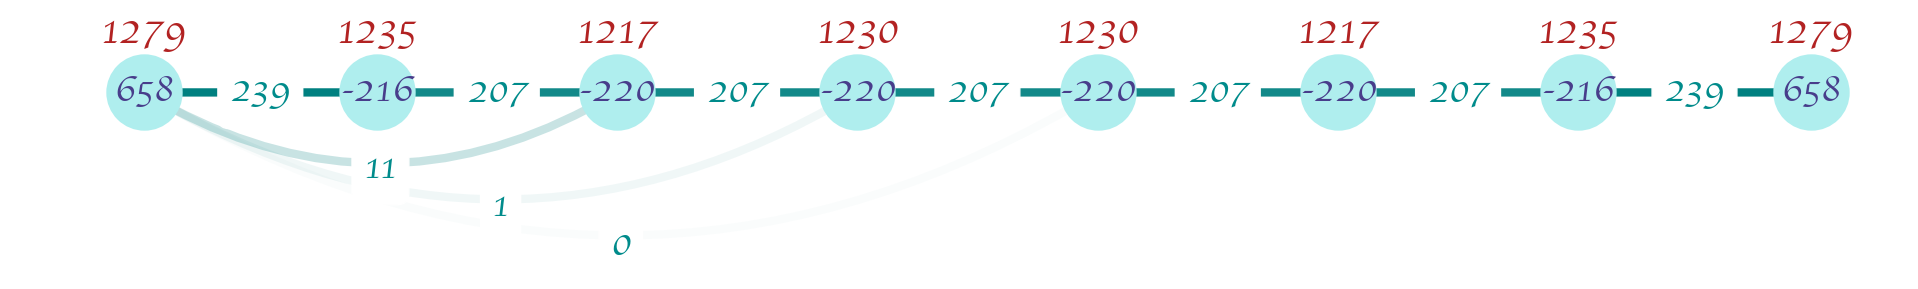

In [16]:
from Hubbard.plot import *
import numpy as np
from Hubbard.io import *

N = 20
L = 8
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=1550,
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 lattice_symmetry=True,
                 symmetry=True,
                 verbosity=0)
fn = '../output/3D_8x1_square_None_neq.ini'
read_file(fn, G)
G.draw_graph(nnn=True, A=G.A, U=G.U, scalebar=False)


Lattice: lattice shape is square; lattice constants set to: (1550, 1550)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.


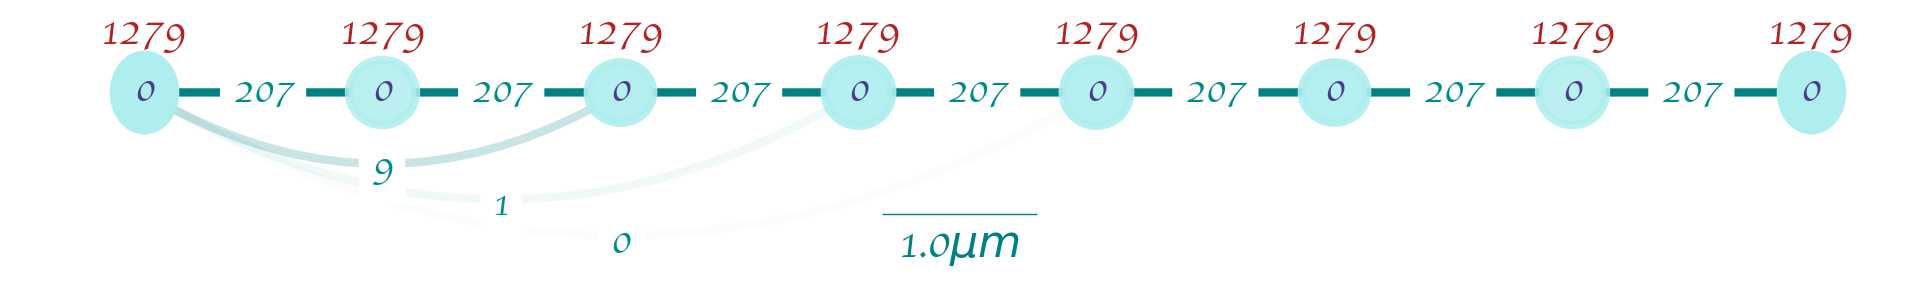

In [17]:
from Hubbard.plot import *
import numpy as np
from Hubbard.io import *

N = 20
L = 8
Ly = 1
d = 3
shape = 'square'
w = 'x'
eqt = 'UvT'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(52.26, 1000),
                 lc=1550,
                 ascatt=1770,
                 laser=780,
                 band=1,
                 dim=d,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 equalize_V0=False,
                 eqtarget=eqt,
                 lattice_symmetry=True,
                 symmetry=True,
                 verbosity=0)
fn = '../output/3D_8x1_square_x_UvT_trf.ini'
read_file(fn, G)
G.draw_graph(nnn=True, A=G.A, U=G.U, scalebar=True)
